# Import Library

In [1]:
from keras.models import model_from_json
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance
import tensorflow as tf


# Load Trained Model

In [49]:
class_names = {
 0:'Fake',
 1:'Real'  
}
f = Path("models/model_structure.json")
model_structure = f.read_text()
model = model_from_json(model_structure)
model.load_weights("models/model_weights.h5")
path = "u_input/testreal.jpeg"
img1 = load_img(path, target_size=(1228, 1228))

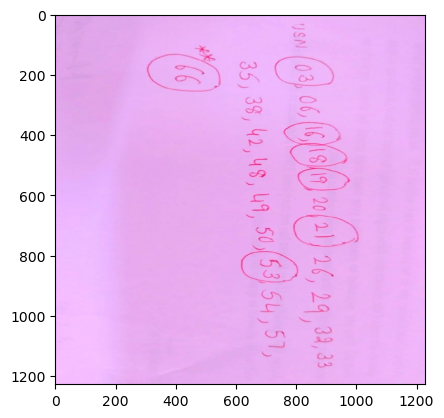

In [50]:
plt.imshow(img1)

# Extract ELA Feature

In [51]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

In [52]:
image_size = (128, 128)

In [53]:
ela_img = convert_to_ela_image(path, 90)
img = np.array(convert_to_ela_image(path, 90).resize(image_size)).flatten() / 255.0

In [54]:
img = np.asarray(img)

In [55]:
img = img.reshape(-1, 128, 128, 3)

In [56]:
results = model.predict(img)

1/1 [==============================] - 0s 41ms/step


In [57]:
print(results[0])

[7.885941e-17 1.000000e+00]


In [58]:
single_result = results[0]

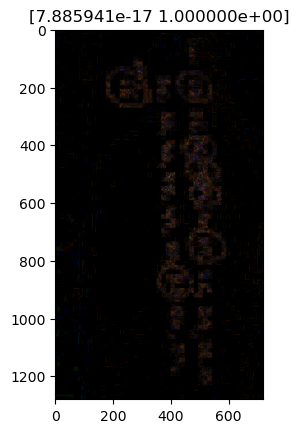

In [59]:
plt.imshow(ela_img)
plt.title(single_result)
plt.show()

In [60]:
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index] 
if np.max(single_result) < 0.84 :
    if most_likely_class_index == 1:
        most_likely_class_index = 1 - most_likely_class_index 

In [61]:
most_likely_class_index

1

In [62]:
class_label = class_names[most_likely_class_index]

# Print Result

In [48]:
print("Predicted class is  {} - Confidence Score: {:2f}".format(class_label, class_likelihood))

Predicted class is  Fake - Confidence Score: 0.975452


# Thank You...